Loading D:\Imputed_file\song21_Imputed.mat...


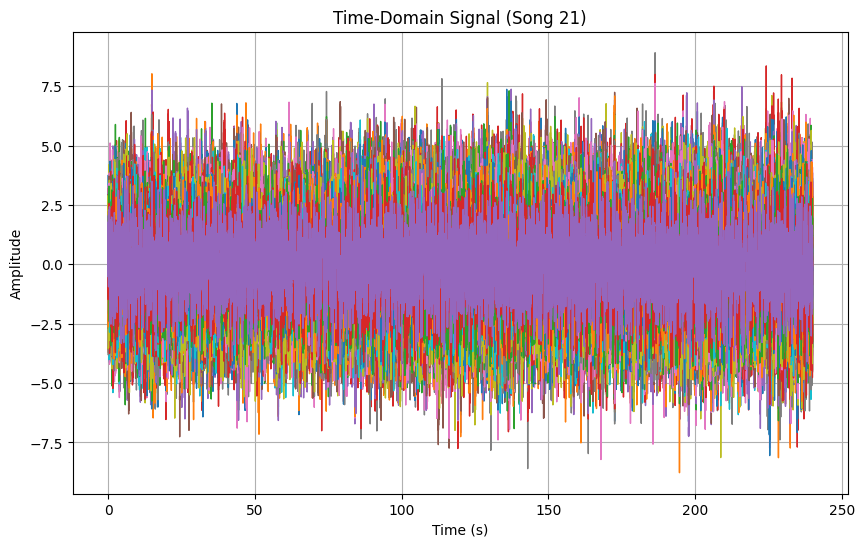

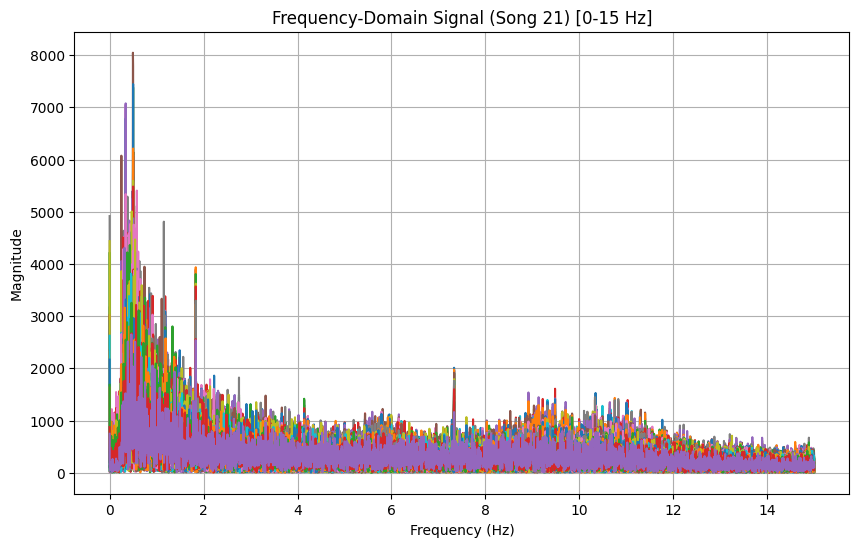

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import loadmat

# Helper function for DC correction (replace this with actual logic if needed)
def median_dccorrect_all_trials(data):
    return data - np.median(data, axis=1, keepdims=True)

# Visualization function for time-domain signal
def plot_time_domain(data, fs, song_idx=1):
    T = data.shape[1]
    time_axis = np.arange(0, T) / fs
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, np.mean(data, axis=2).T, linewidth=1)
    plt.title(f'Time-Domain Signal (Song {song_idx})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_frequency_domain(data, fs, song_idx=1):
    T = data.shape[1]
    freq_axis = np.fft.fftfreq(T, d=1/fs)[:T // 2]
    fft_data = np.abs(fft(np.mean(data, axis=2), axis=1))[:, :T // 2]
    
    # Filter to show only the 0 - 15 Hz range
    valid_freqs = freq_axis <= 15  # Select frequencies less than or equal to 15 Hz
    freq_axis = freq_axis[valid_freqs]  # Filter frequency axis
    fft_data = fft_data[:, valid_freqs]  # Filter FFT data to the corresponding frequencies
    
    # Plot the FFT data in the specified frequency range
    plt.figure(figsize=(10, 6))
    plt.plot(freq_axis, fft_data.T)  # Transpose to align channels correctly for plotting
    plt.title(f'Frequency-Domain Signal (Song {song_idx}) [0-15 Hz]')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()


# Load the first song's data (song 21 in your case)
in_dir = r'D:\Imputed_file'  # Adjust the path as needed
fs = 125  # Sampling frequency (Hz)
sec_start = 15  # Start of the epoch in seconds
epoch_len_sec = 4 * 60  # Length of the epoch (4 minutes)
epoch_len_samp = fs * epoch_len_sec  # Number of samples in the epoch

# Load the first song's data
song_idx = 21
curr_fn = os.path.join(in_dir, f'song{song_idx}_Imputed.mat')
print(f'Loading {curr_fn}...')
mat_data = loadmat(curr_fn)

# Extract the EEG data for the first song (data key will be 'data21')
data_key = f'data{song_idx}'
tempX_0 = mat_data[data_key]

# Apply DC correction and extract the epoch
tempX_dc = median_dccorrect_all_trials(tempX_0)
tempX_epoch = tempX_dc[:, sec_start * fs:(sec_start * fs + epoch_len_samp), :]

# Visualize the time-domain signal
plot_time_domain(tempX_epoch, fs, song_idx=song_idx)

# Visualize the frequency-domain signal (FFT)
plot_frequency_domain(tempX_epoch, fs, song_idx=song_idx)
